# Random sample imputation
is a technique used to handle missing values by randomly selecting values from the observed data and using them to fill in the missing values. It involves taking a random sample of non-missing values from the variable and assigning those values to the missing entries.

In this approach, missing values are replaced with values randomly drawn from the existing data, preserving the overall distribution and variability of the variable. By introducing randomness, random sample imputation avoids biases that could arise from imputing missing values with fixed values or summary statistics.

Random sample imputation is useful when missing values are believed to be missing at random, and the missingness does not carry any specific pattern or meaning. It allows for a more flexible and realistic estimation of the missing values based on the available information.

However, it's important to note that random sample imputation does not take into account any relationships or patterns in the data, and it may not accurately reflect the true values of the missing data. Additionally, the imputation results may vary if the random sampling is performed multiple times.

When applying random sample imputation, it's crucial to consider the limitations and potential impact on subsequent analysis or modeling. It may be more appropriate for exploratory analysis or as a sensitivity analysis rather than for final imputation in critical scenarios. Advanced imputation techniques that incorporate more sophisticated modeling or consider the specific characteristics of the data may be preferred in certain cases.

## Here are some of the advantages of random sample imputation:

1. It is simple and easy to implement.
2. It does not require any special software.
3. It can be used with any type of variable.

## Here are some of the disadvantages of random sample imputation:

1. It can introduce bias into the dataset if the missing values are not MCAR.
2. It does not take into account the relationships between different variables.
3. It can be computationally expensive if the dataset is large.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# For numerical data

In [2]:
df = pd.read_csv("train.csv", usecols=["Age", "Fare", "Survived"])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [7]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [8]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
X_train["Age_imputed"] = X_train["Age"]
X_test["Age_imputed"] = X_test["Age"]

In [11]:
X_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [12]:
X_test.head()

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0


In [13]:
# Filling the nan values in age_imputed column with the random data within the Age column.
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [14]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values ## These are the randomly generated datas from the age colum which will be fitted in the age_imputed column

array([27.  , 40.  , 32.  , 30.  , 56.  , 45.  , 27.  ,  4.  , 22.  ,
        3.  , 34.  , 40.  , 46.  , 32.  , 62.  , 29.  , 49.  , 36.  ,
       19.  , 16.  , 54.  , 44.  , 20.  , 24.  , 47.  , 44.  , 32.  ,
       19.  ,  3.  , 45.  , 26.  , 27.  , 11.  , 52.  , 39.  , 39.  ,
       18.  , 22.  , 22.  , 21.  , 43.  , 49.  , 27.  , 54.  , 27.  ,
       28.  , 26.  , 32.  , 37.  ,  7.  , 26.  , 52.  , 26.  , 64.  ,
       60.  , 31.  , 24.  , 47.  ,  6.  ,  7.  , 48.  ,  2.  , 19.  ,
       17.  , 22.  ,  2.  , 16.  , 22.  , 24.  , 30.  , 30.  , 23.  ,
       24.  , 22.  , 24.  , 29.  , 24.  , 35.  , 22.  , 16.  , 65.  ,
       27.  , 46.  , 30.  , 17.  , 21.  , 18.  , 29.  , 45.  , 21.  ,
       40.  , 31.  , 31.  , 50.  , 39.  , 29.  , 29.  , 21.  , 31.  ,
       13.  , 30.  , 21.  ,  0.75,  2.  , 23.  ,  8.  , 25.  , 34.  ,
       47.  , 34.5 , 51.  , 43.  , 14.5 , 29.  , 42.  , 63.  ,  1.  ,
       27.  ,  3.  , 21.  , 19.  , 16.  , 46.  , 18.  , 36.  , 18.  ,
       36.5 , 37.  ,

In [15]:
X_train['Age'].isnull().sum()

148

In [16]:
X_train # You can see values parallel to nan on the age colum is filled with a random value in the age_imputed column

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,27.0
493,71.0,49.5042,71.0
527,NaN,221.7792,2.0


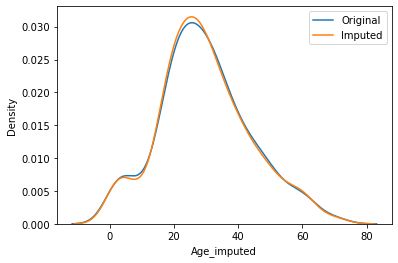

In [17]:
# There is no change in distribution after replacing nan with random values within the data set
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [18]:
# THere is a silght difference in the variance but its fine the difference isn't even too much, considerable
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  201.89328657137455


In [20]:
X_train[['Fare', 'Age', 'Age_imputed']].cov() # BUt the co-vaiance between them is hevily affected

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.975328
Age,71.512440,204.349513,204.349513
Age_imputed,53.975328,204.349513,201.893287


<AxesSubplot:>

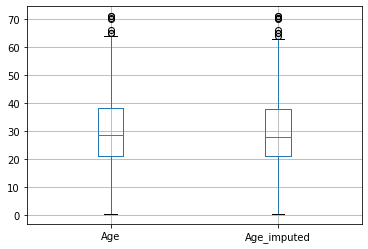

In [21]:
X_train[['Age', 'Age_imputed']].boxplot() # THe plots are nearly identical and note that it doesnt affect the outliers in any way. THey remain the same

# For categorical data

In [23]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [24]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [25]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [26]:
X = data
y = data['SalePrice']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [29]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1340,NaN,TA,123000,TA,NaN
449,NaN,TA,120000,TA,NaN
809,NaN,Fa,106000,Fa,NaN
611,TA,TA,148000,TA,TA
758,NaN,TA,179400,TA,NaN


In [30]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [31]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [32]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Ex,0.000907,0.000856
Po,0.000907,0.000856


In [33]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.648709
TA,0.412439,0.538721
Fa,0.040917,0.053872
Po,0.027823,0.038159
Ex,0.024550,0.031425


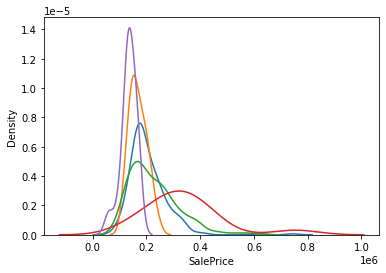

In [34]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

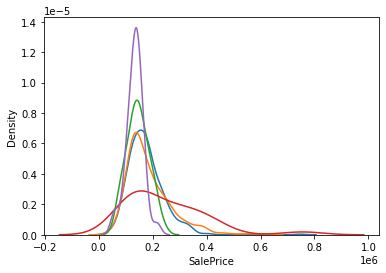

In [35]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()